In [1]:
import pyemu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.reference import SpatialReference
import os
import sys
from shutil import copyfile
import fileinput

sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
ws = "workspace"
m_n_i = "pest_3d_r"
m_n = "pest_3D_R"

case = "3D_test"

In [3]:
sim = fp.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package wel...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package obs...
  loading ims package pest_3d_r...


In [4]:
sr = SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array, xll=m.dis.xorigin.array, yll=m.dis.yorigin.array)
sr

xul:664525; yul:6207475; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

In [5]:
# empty pst object
template_ws = "template"
pf = pyemu.prototypes.PstFrom(original_d=ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False)

2020-08-03 16:16:50.473606 starting: opening PstFrom.log for logging
2020-08-03 16:16:50.473606 starting PstFrom process
2020-08-03 16:16:50.481637 starting: setting up dirs
2020-08-03 16:16:50.481637 starting: removing existing new_d 'template'
2020-08-03 16:16:50.552099 finished: removing existing new_d 'template' took: 0:00:00.070462
2020-08-03 16:16:50.552099 starting: copying original_d 'workspace' to new_d 'template'
2020-08-03 16:16:50.715206 finished: copying original_d 'workspace' to new_d 'template' took: 0:00:00.163107
2020-08-03 16:16:50.715206 finished: setting up dirs took: 0:00:00.233569


In [6]:
#add observation
#Quat
df = pd.read_csv(os.path.join(template_ws,"heads_q.csv"),index_col=0)
hds_df = pf.add_observations("heads_q.csv",insfile="heads_q.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="quat",obsgp=True)
#P
df = pd.read_csv(os.path.join(template_ws,"heads_pc.csv"),index_col=0)
hds_df = pf.add_observations("heads_pc.csv",insfile="heads_pc.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="pc",obsgp=True)

#Q map
file = "heads_map_q.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="qmap",obsgp=True)

#P map
# file = "heads_map_p.csv"
# df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
# hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
#                 use_cols=list(df.columns.values),prefix="Pmap",obsgp=True)

#pf.obs_dfs[2].weight = 0.5 # set a weaker weigth to these points

2020-08-03 16:16:50.775636 starting: adding observations from tabular output file
2020-08-03 16:16:50.775636 starting: reading list template\heads_q.csv
2020-08-03 16:16:50.785696 finished: reading list template\heads_q.csv took: 0:00:00.010060
2020-08-03 16:16:50.785696 starting: building insfile for tabular output file heads_q.csv
2020-08-03 16:16:50.856191 finished: building insfile for tabular output file heads_q.csv took: 0:00:00.070495
2020-08-03 16:16:50.856191 starting: adding observation from instruction file 'template\heads_q.csv.ins'
2020-08-03 16:16:50.884332 finished: adding observation from instruction file 'template\heads_q.csv.ins' took: 0:00:00.028141
2020-08-03 16:16:50.886357 finished: adding observations from tabular output file took: 0:00:00.110721
2020-08-03 16:16:50.896427 starting: adding observations from tabular output file
2020-08-03 16:16:50.896427 starting: reading list template\heads_pc.csv
2020-08-03 16:16:50.906478 finished: reading list template\heads_p

In [7]:
#P map
file = "heads_map_p.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="Pmap",obsgp=True)

2020-08-03 16:16:51.128839 starting: adding observations from tabular output file
2020-08-03 16:16:51.128839 starting: reading list template\heads_map_p.csv
2020-08-03 16:16:51.148954 finished: reading list template\heads_map_p.csv took: 0:00:00.020115
2020-08-03 16:16:51.148954 starting: building insfile for tabular output file heads_map_p.csv
2020-08-03 16:16:51.189221 finished: building insfile for tabular output file heads_map_p.csv took: 0:00:00.040267
2020-08-03 16:16:51.189221 starting: adding observation from instruction file 'template\heads_map_p.csv.ins'
2020-08-03 16:16:51.229467 finished: adding observation from instruction file 'template\heads_map_p.csv.ins' took: 0:00:00.040246


KeyError: "None of [Index(['pmap_usecol:pmap_1_101_78_time:1.0',\n       'pmap_usecol:pmap_1_102_23_time:1.0',\n       'pmap_usecol:pmap_1_102_57_time:1.0',\n       'pmap_usecol:pmap_1_102_64_time:1.0',\n       'pmap_usecol:pmap_1_103_55_time:1.0',\n       'pmap_usecol:pmap_1_104_16_time:1.0',\n       'pmap_usecol:pmap_1_104_19_time:1.0',\n       'pmap_usecol:pmap_1_104_63_time:1.0',\n       'pmap_usecol:pmap_1_105_107_time:1.0',\n       'pmap_usecol:pmap_1_106_32_time:1.0',\n       ...\n       'pmap_usecol:pmap_1_95_59.1_time:1.0',\n       'pmap_usecol:pmap_1_95_59_time:1.0',\n       'pmap_usecol:pmap_1_95_64_time:1.0',\n       'pmap_usecol:pmap_1_97_106_time:1.0',\n       'pmap_usecol:pmap_1_97_109_time:1.0',\n       'pmap_usecol:pmap_1_98_38_time:1.0',\n       'pmap_usecol:pmap_1_98_70_time:1.0',\n       'pmap_usecol:pmap_1_98_86_time:1.0',\n       'pmap_usecol:pmap_1_99_105_time:1.0',\n       'pmap_usecol:pmap_1_99_123_time:1.0'],\n      dtype='object', length=200)] are in the [index]"

In [10]:
def chInsfle(file):
    
    """
    change a ins file create with PstFrom (only for a model with 1 stress period)
    in the right format to be used by PEST
    """
    
    fileout = "tmp"
    with open(file) as f:
        with open(fileout,"w") as fout:
            for i,line in enumerate(f):
                if i < 2:
                    fout.write(line)
                if i > 1:
                    for o,split in enumerate(line.split("w")):
                        if o == 1:
                            fout.write("~,~")
                        fout.write(split)
                        
    from shutil import copyfile
    copyfile(fileout, file) # copy 
    os.remove(fileout) # delete tmp file

chInsfle("template/heads_pc.csv.ins")
chInsfle("template/heads_q.csv.ins")
chInsfle("template/heads_map_q.csv.ins")
chInsfle("template/heads_map_p.csv.ins")

pf.obs_dfs[0].obgnme = "Quat"
pf.obs_dfs[1].obgnme = "Pc"
pf.obs_dfs[2].obgnme = "Qmap"
pf.obs_dfs[3].obgnme = "Pmap"

In [11]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:0, nnz_obs:522


### Parameters

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\geostats.py:244: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


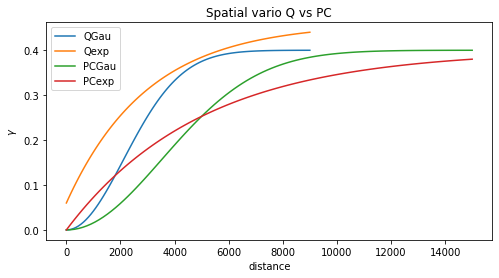

In [12]:
fig,ax = plt.subplots(figsize=(8,4))

#q
vq1 = pyemu.geostats.GauVario(a=3000,contribution=0.4)
vq2 = pyemu.geostats.ExpVario(a=3000,contribution=0.4)
grid_q1 = pyemu.geostats.GeoStruct(variograms=vq1, transform='log')
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2,nugget=0.06 , transform='log')
b=grid_q1.plot()
b=grid_q2.plot()

#pc
vp1 = pyemu.geostats.GauVario(a=5000,contribution=0.4)
vp2 = pyemu.geostats.ExpVario(a=5000,contribution=0.4)
grid_pc1 = pyemu.geostats.GeoStruct(variograms=vp1, transform='log')
grid_pc2 = pyemu.geostats.GeoStruct(variograms=vp2, transform='log')
a=grid_pc1.plot()
a=grid_pc2.plot()

a.set_title("Spatial vario Q vs PC")
plt.legend(["QGau","Qexp","PCGau","PCexp"])

In [13]:
## pp quat
zq = m.dis.idomain.array[1] # zone array for pp
zq[:,140:]=0
zq[zq<0]=0
#plt.imshow(zq)
pf.add_parameters(filenames="kq.txt",par_type="pilotpoint",pp_space=8,zone_array=zq,
                   par_name_base="kp_q",pargp="pp_q",
                   upper_bound=3,lower_bound=0.005,ult_ubound=6e-3,ult_lbound=1e-5,geostruct=grid_q1)

2020-08-03 16:17:26.564780 starting: adding pilotpoint type multiplier style parameters for file(s) ['kq.txt']
2020-08-03 16:17:26.564780 starting: loading array template\kq.txt
2020-08-03 16:17:26.635286 finished: loading array template\kq.txt took: 0:00:00.070506
2020-08-03 16:17:26.643312 loaded array 'kq.txt' of shape (182, 183)
2020-08-03 16:17:26.733964 starting: writing array-based template file 'kp_q_inst0_pilotpoint.csv.tpl'
2020-08-03 16:17:26.733964 starting: setting up pilot point parameters
2020-08-03 16:17:26.733964 No spatial reference (containing cell spacing) passed.
2020-08-03 16:17:26.733964 OK - using spatial reference in parent object.
2020-08-03 16:17:27.502609 118 pilot point parameters created
2020-08-03 16:17:27.502609 pilot point 'pargp':kp_q_inst:0
2020-08-03 16:17:27.502609 finished: setting up pilot point parameters took: 0:00:00.768645
2020-08-03 16:17:27.558433 starting: calculating factors for pargp=kp_q_inst:0
2020-08-03 16:17:27.559436 saving krige var

In [14]:
## pp pc
zpc = m.dis.idomain.array[3] # zone array for pp
zpc[:,140:]=0
zpc[zpc<0]=0
#plt.imshow(zpc)

pf.add_parameters(filenames="kpc.txt",par_type="pilotpoint",pp_space=8,zone_array=zpc,
                   par_name_base="kp_pc",pargp="pp_pc",
                   upper_bound=50,lower_bound=0.05,ult_ubound=5e-4,ult_lbound=5e-7,geostruct=grid_pc1)

2020-08-03 16:18:55.752405 starting: adding pilotpoint type multiplier style parameters for file(s) ['kpc.txt']
2020-08-03 16:18:55.765042 starting: loading array template\kpc.txt
2020-08-03 16:18:55.851041 finished: loading array template\kpc.txt took: 0:00:00.085999
2020-08-03 16:18:55.852041 loaded array 'kpc.txt' of shape (182, 183)
2020-08-03 16:18:55.976036 starting: writing array-based template file 'kp_pc_inst0_pilotpoint.csv.tpl'
2020-08-03 16:18:55.977036 starting: setting up pilot point parameters
2020-08-03 16:18:55.978035 No spatial reference (containing cell spacing) passed.
2020-08-03 16:18:55.979036 OK - using spatial reference in parent object.
2020-08-03 16:18:57.112709 162 pilot point parameters created
2020-08-03 16:18:57.113707 pilot point 'pargp':kp_pc_inst:0
2020-08-03 16:18:57.114708 finished: setting up pilot point parameters took: 0:00:01.137672
2020-08-03 16:18:57.191478 starting: calculating factors for pargp=kp_pc_inst:0
2020-08-03 16:18:57.193513 saving kr

2020-08-03 16:20:30.091072 starting: adding zone type multiplier style parameters for file(s) ['irr.txt']
2020-08-03 16:20:30.091072 starting: loading array template\irr.txt
2020-08-03 16:20:30.153070 finished: loading array template\irr.txt took: 0:00:00.061998
2020-08-03 16:20:30.154116 loaded array 'irr.txt' of shape (182, 183)
2020-08-03 16:20:30.215067 starting: writing array-based template file 'irr_inst0_zone.csv.tpl'
2020-08-03 16:20:30.216069 starting: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0']
2020-08-03 16:20:30.379063 finished: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0'] took: 0:00:00.162994
2020-08-03 16:20:30.379063 finished: writing array-based template file 'irr_inst0_zone.csv.tpl' took: 0:00:00.163996
2020-08-03 16:20:30.410062 starting: adding parameters for file(s) ['irr.txt']


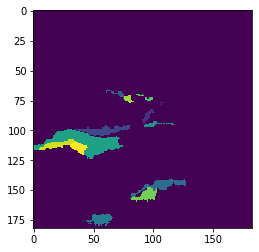

In [15]:
#irri
zi = np.loadtxt(os.path.join(ws,"zone_irr.txt"))
plt.imshow(zi)
pf.add_parameters(filenames="irr.txt",par_type="zone",zone_array=zi,
                   par_name_base="irr",pargp="irr",
                   upper_bound=2,lower_bound=0.8)

In [17]:
# kpms and kep
pf.add_parameters(filenames="kep.txt",par_type="constant",
                    par_name_base="ep",pargp="ep",
                    upper_bound=30,lower_bound=0.1)
pf.add_parameters(filenames="kpms.txt",par_type="constant",
                 par_name_base="pms",pargp="pms",upper_bound=30,lower_bound=0.05)

pf.add_parameters(filenames="kqm.txt",par_type="constant",
                 par_name_base="qm",pargp="qm",upper_bound=10,lower_bound=0.01)

2020-08-03 16:20:40.359978 starting: adding constant type multiplier style parameters for file(s) ['kep.txt']
2020-08-03 16:20:40.359978 starting: loading array template\kep.txt
2020-08-03 16:20:40.420316 finished: loading array template\kep.txt took: 0:00:00.060338
2020-08-03 16:20:40.422342 loaded array 'kep.txt' of shape (182, 183)
2020-08-03 16:20:40.493060 starting: writing array-based template file 'ep_inst0_constant.csv.tpl'
2020-08-03 16:20:40.493060 starting: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0']
2020-08-03 16:20:40.833340 finished: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0'] took: 0:00:00.340280
2020-08-03 16:20:40.833340 finished: writing array-based template file 'ep_inst0_constant.csv.tpl' took: 0:00:00.340280
2020-08-03 16:20:40.925957 starting: adding parameters for file(s) ['kep.txt']
2020-08-03 16:20:40.934000 starting: adding constant type multiplier style parameters for file(s) ['kpms.txt']
2020-08-03 16:20:40.934000 

### rivers

In [18]:
rivers = [riv for riv in os.listdir(template_ws) if riv.endswith("riv")]

In [19]:
def riv_tpl(rivers,tmp_ws):
    for riv in rivers:
        riv_file = os.path.join(tmp_ws,riv)
        tpl_file = riv_file+".tpl"
        copyfile(riv_file, tpl_file)
        
        with fileinput.FileInput(tpl_file, inplace=True) as file:
            for line in file:
                print(line.replace("    0.00500000   ", "~    c_{}     ~".format(riv.split(".")[0])), end='')
        with open(tpl_file, 'r+') as f:
            content = f.read()
            line = "ptf ~"
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + "\n" + content)
        
        #add parameter to control file
        dic = {"parnme":"c_{}".format(riv.split(".")[0]),
              "parval1": 0.005,
               "pargp": "cond",
               "tpl_filename": tpl_file,
               'input_filename':riv_file,
               "partype" : "constant",
               "partrans" : "log",
               "parubnd" : 0.01,
               "parlbnd" : 0.001,
               "parchglim" : "factor",
               "scale" : 1.0,
               "dercom" : 1,
               "offset" : 0.0} 
        a = pd.DataFrame(dic,index=["c_{}".format(riv.split(".")[0])])
        pf.par_dfs[0] = pf.par_dfs[0].append(a,sort=False)
        
        pf.tpl_filenames.append(riv+".tpl")
        pf.input_filenames.append(riv)

In [20]:
riv_tpl(rivers,template_ws)

In [21]:
pf.build_pst("{}.pst".format(case))

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:472: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  par_data = pd.concat(self.par_dfs).loc[:, par_data_cols]
C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:127: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


noptmax:30, npar_adj:303, nnz_obs:522


In [22]:
# add run model command
pf.mod_sys_cmds.append("..\..\..\exe\mf6")
pst = pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:303, nnz_obs:522
2020-08-03 16:20:47.065681 forward_run line:pyemu.os_utils.run(r'..\..\..\exe\mf6')



2020-08-03 16:20:47.731728 starting: building prior covariance matrix
2020-08-03 16:20:47.941426 saving prior covariance matrix to file template\3D_test.prior.cov


C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\helpers.py:248: UserWarning: geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!
  warnings.warn("geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!")


2020-08-03 16:20:48.043980 finished: building prior covariance matrix took: 0:00:00.312252


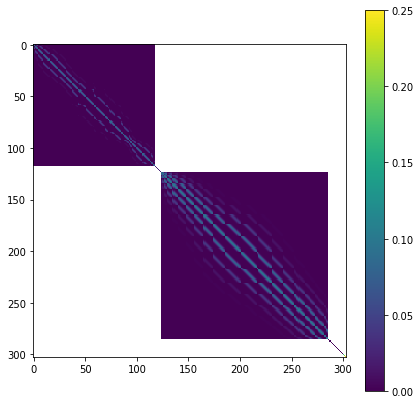

In [23]:
cov = pf.build_prior()
x = cov.x.copy()
x[x==0.0] = np.NaN
fig,ax = plt.subplots(1,1,figsize=(7,7))
g = ax.imshow(x)
plt.colorbar(g)

### Tikhonov

In [37]:
# I  will add a zero order thikonov (preferred value) and initial values needs to be appropriate
# I extract reference k from the 2D model already manually calibrated with minimize and calculate the ratio with the inversion k (setup in the setup_flopy notebook)
# Each pp will have an initial value


### quat
ref_k = np.loadtxt("../../Modeles3D/test_3D/working/kq.txt")
inv_k = np.loadtxt("workspace/kq.txt")

mask = (pst.parameter_data[pst.parameter_data["pargp"]=="kp_q_inst:0"].i.values.astype(int),
  pst.parameter_data[pst.parameter_data["pargp"]=="kp_q_inst:0"].j.values.astype(int))
parval = (ref_k/inv_k)[mask] 

pst.parameter_data.loc[pst.parameter_data["pargp"]=="kp_q_inst:0","parval1"] = parval

### plio
ref_k = np.loadtxt("../../Modeles3D/test_3D/working/kpc.txt")
inv_k = np.loadtxt("workspace/kpc.txt")

mask = (pst.parameter_data[pst.parameter_data["pargp"]=="kp_pc_inst:0"].i.values.astype(int),
  pst.parameter_data[pst.parameter_data["pargp"]=="kp_pc_inst:0"].j.values.astype(int))
parval = (ref_k/inv_k)[mask] 

pst.parameter_data.loc[pst.parameter_data["pargp"]=="kp_pc_inst:0","parval1"] = parval

#setup zero order tikho (preferred value regularization)
pyemu.helpers.zero_order_tikhonov(pst)

pst.prior_information.iloc[286:,-1]=0

In [39]:
pst.control_data.noptmax = -1 # FOR JACOBIAN
pst.write(os.path.join(template_ws,"{}.pst".format(case)))

noptmax:-1, npar_adj:303, nnz_obs:522


In [40]:
#pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd="template")

In [41]:
m_d = "master_glm"

pyemu.os_utils.start_workers(template_ws,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",master_dir=m_d)

In [42]:
t_d ="master_glm"
case = "3D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

#pst.svd_data.eigthresh = 5e-7
pst.control_data.noptmax = 8 # number of iterations (should be set to a great value (50))
pst.control_data.nphistp = 8
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",
                             master_dir=m_d)

noptmax:8, npar_adj:303, nnz_obs:522
